In [1]:
# Set up the environment for anlysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.colors as mcolors

In [2]:
# Read in the dataset:
wowbgs2 = pd.read_csv('/kaggle/input/world-of-warcraft-battlegrounds/wowbgs2.csv')

# Check out the data info:
wowbgs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  5383 non-null   object 
 1   Code          5383 non-null   object 
 2   Faction       5383 non-null   object 
 3   Class         5383 non-null   object 
 4   KB            5383 non-null   int64  
 5   D             5383 non-null   int64  
 6   HK            5383 non-null   int64  
 7   DD            5383 non-null   int64  
 8   HD            5383 non-null   int64  
 9   Honor         5383 non-null   int64  
 10  Win           2723 non-null   float64
 11  Lose          2660 non-null   float64
 12  Rol           5383 non-null   object 
 13  BE            954 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 588.9+ KB


The column headers decoded from the source of the data:

* Battleground: Two letter code to indicate the kind of battleground
* Code: code for the battleground team instance
* Faction: faction of the player (Horde or Alliance).
* Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter).
* KB: number of mortal kills given by the player.
* D: number of times that the player died.
* HK: number of killings where the player or his/her group contributed.
* DD: damage done by the player.
* HD: healing done by the player.
* Honor: honor awarded to the player.
* Win: 1 if the player won.
* Lose: 1 if the player lost.
* Rol: dps if the player is a damage dealer; heal if the player is focused on healing allies. Not all classes can be healers, just Shaman, Paladin, priest, Monk and Druid, but all classes can be damage dealers.
* BE: some weeks there is a bonus event, when the honor gained is increased. 1 if the battleground happened during that week.

In [3]:
wowbgs2.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [4]:
wowbgs2.tail()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
5378,TK,TK40,Horde,Shaman,3,0,47,19154,2611,465,1.0,NaN,dps,1.0
5379,TK,TK40,Alliance,Mage,1,4,12,26117,11492,291,NaN,1.0,dps,1.0
5380,TK,TK40,Alliance,Demon Hunter,2,4,9,39954,9699,282,NaN,1.0,dps,1.0
5381,TK,TK40,Alliance,Paladin,4,6,9,54729,20736,282,NaN,1.0,dps,1.0
5382,TK,TK40,Alliance,Rogue,0,5,10,11495,20355,283,NaN,1.0,dps,1.0


In [5]:
# Checkout the descriptive statistics on the data itself:
wowbgs2.describe()

,KB,D,HK,DD,HD,Honor,Win,Lose,BE
count,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,2723.0,2660.0,954.0
mean,3.032881,3.050529,26.715400,43880.838752,28290.266766,413.104774,1.0,1.0,1.0
std,3.163663,2.201325,16.102191,34842.726718,39351.377127,214.056282,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.0,1.0,1.0
25%,1.000000,1.000000,14.000000,16838.000000,6526.500000,238.000000,1.0,1.0,1.0
50%,2.000000,3.000000,25.000000,37007.000000,13253.000000,374.000000,1.0,1.0,1.0
75%,5.000000,5.000000,37.000000,62565.000000,29288.000000,537.000000,1.0,1.0,1.0
max,23.000000,13.000000,95.000000,246000.000000,325000.000000,1229.000000,1.0,1.0,1.0


In [6]:
# Checking for nulls in the dataset. True = Nulls False = None

pd.isnull(wowbgs2).any()

Battleground    False
Code            False
Faction         False
Class           False
KB              False
D               False
HK              False
DD              False
HD              False
Honor           False
Win              True
Lose             True
Rol             False
BE               True
dtype: bool

The above tells me that nulls have been found in 3 different columns

* Win
* Lose
* BE

The next step is to look at the nulls to see how they will be handled.

In [7]:
# NOTE: There are also nulls (NaN) in the bonus event (BE) column: 1 = yes, NaN = no.
wowbgs2[(wowbgs2['BE'].isnull())]

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,SM,SM37,Alliance,Mage,0,4,3,23127,4090,167,NaN,1.0,dps,NaN
5241,SM,SM37,Alliance,Druid,0,2,2,7682,3543,134,NaN,1.0,dps,NaN
5242,SM,SM37,Horde,Druid,3,0,24,33961,6901,510,1.0,NaN,dps,NaN
5243,SM,SM37,Alliance,Priest,1,5,3,17254,3347,167,NaN,1.0,dps,NaN


In [8]:
# DECISION: Changing all null values (NaN) to 0 values for this dataset to facilitate calculations and parsing.
wowbgsdf = wowbgs2.fillna(0)
wowbgsdf

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,0.0,dps,0.0
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,0.0,dps,0.0
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,0.0,1.0,heal,0.0
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,0.0,1.0,heal,0.0
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,0.0,1.0,dps,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,TK,TK40,Horde,Shaman,3,0,47,19154,2611,465,1.0,0.0,dps,1.0
5379,TK,TK40,Alliance,Mage,1,4,12,26117,11492,291,0.0,1.0,dps,1.0
5380,TK,TK40,Alliance,Demon Hunter,2,4,9,39954,9699,282,0.0,1.0,dps,1.0
5381,TK,TK40,Alliance,Paladin,4,6,9,54729,20736,282,0.0,1.0,dps,1.0


# **Honor Points earned**

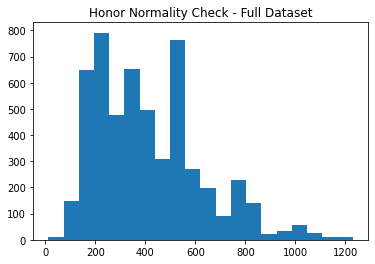

DescribeResult(nobs=5383, minmax=(12, 1229), mean=413.1047742894297, variance=45820.09195602021, skewness=0.8426806224238067, kurtosis=0.3856352044714444)


In [9]:
plt.hist(wowbgsdf['Honor'], bins=20)
plt.title('Honor Normality Check - Full Dataset')
plt.show()
print(stats.describe(wowbgsdf['Honor']))

CONCLUSION: While the histogram looks to be mostly normal, there is a tail to the right. This doesn't matter too much though as the skewness and kurtosis scores are well within the limits to proceed accordingly.